In [27]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/tianjianwang/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [28]:
# data loading

allData = pd.read_csv('/Users/tianjianwang/Documents/car_evaluation_model/used-cars-database/autos.csv', encoding='Latin1')
# is there really nrOfPictures, from what I could see it's all 0?

allData.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [29]:
print allData['nrOfPictures'].sum()
del allData['nrOfPictures']

0


In [30]:
print allData.groupby('seller').size()
allData.drop(allData[allData['seller'] == 'gewerblich'].index, inplace=True)
noSellerData = allData.drop('seller', 1)
noSellerData.head(5)

seller
gewerblich         3
privat        371525
dtype: int64


,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [31]:
print noSellerData.groupby('offerType').size()
# only 12 people asking for cars(Gesuch), so we might as well delete those rows too

noSellerData.drop(noSellerData[noSellerData['offerType'] == 'Gesuch'].index, inplace=True)
print noSellerData.groupby('offerType').size()

noOfferTypeData = noSellerData.drop('offerType', axis = 1)
noOfferTypeData.head(5)

offerType
Angebot    371513
Gesuch         12
dtype: int64
offerType
Angebot    371513
dtype: int64


,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [32]:
print len(noOfferTypeData.groupby('name').size())
noNameData = noOfferTypeData.drop('name', axis = 1)
noNameData.head(5)

233517


,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [33]:
print noNameData.groupby('abtest').size()
# replace column abtest wth integer values, with 1 as test and 0 as control
noNameData.loc[noNameData['abtest'] == 'test', 'abtest'] = 1
noNameData.loc[noNameData['abtest'] == 'control', 'abtest'] = 0
noNameData.head(5)

abtest
control    178933
test       192580
dtype: int64


,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,480,1,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,1,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,1,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,1,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,1,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [34]:
print noNameData.groupby('vehicleType').size()
noNameData.loc[noNameData['vehicleType'] == 'andere', 'vehicleType'] = 'other'
noNameData.loc[noNameData['vehicleType'] == 'cabrio', 'vehicleType'] = 'convertible'
noNameData.loc[noNameData['vehicleType'] == 'kleinwagen', 'vehicleType'] = 'smallcar'
noNameData.loc[noNameData['vehicleType'] == 'kombi', 'vehicleType'] = 'estatecar'
noNameData.loc[noNameData['vehicleType'] == 'limousine', 'vehicleType'] = 'sedan'

vehicleType
andere         3357
bus           30199
cabrio        22898
coupe         19014
kleinwagen    80020
kombi         67563
limousine     95893
suv           14707
dtype: int64


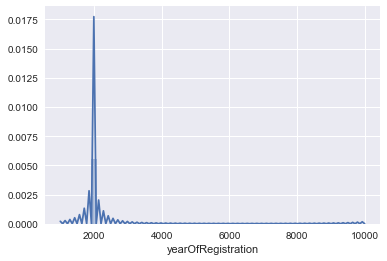

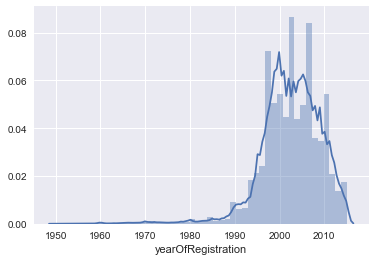

In [35]:
noNameData['yearOfRegistration'].describe()
sns.distplot(noNameData['yearOfRegistration'])
sns.plt.show()
noNameData.drop(noNameData[noNameData['yearOfRegistration'] > 2015].index, inplace = True)
noNameData.drop(noNameData[noNameData['yearOfRegistration'] < 1950].index, inplace = True)
sns.distplot(noNameData['yearOfRegistration'])
sns.plt.show()

5953
71745
16816


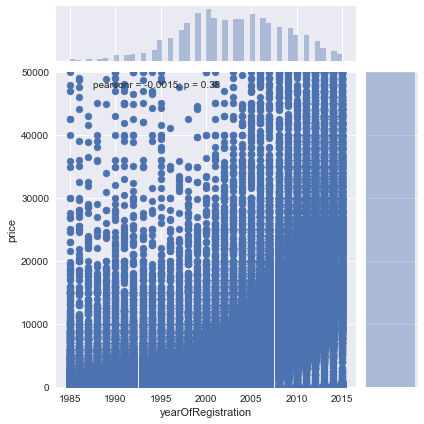

In [36]:
numOldCars = len(noNameData[noNameData['yearOfRegistration'] < 1985].index)
print numOldCars
bufData = noNameData.ix[noNameData[noNameData['yearOfRegistration'] < 1985].index]
print bufData['price'].sum() / numOldCars
print noNameData.ix[noNameData[noNameData['yearOfRegistration'] >= 1985].index]['price'].sum()/(noNameData.shape[0] - numOldCars)
noNameData.drop(noNameData[noNameData['yearOfRegistration'] < 1985].index, inplace = True)
sns.jointplot(x = 'yearOfRegistration', y = 'price', data = noNameData, ylim = (0,50000))
sns.plt.show()

In [37]:
noNameData.loc[noNameData['gearbox'] == 'manuell', 'gearbox'] = 'manual'
noNameData.loc[noNameData['gearbox'] == 'automatik', 'gearbox'] = 'automatic'
noNameData.drop(noNameData['powerPS'] == 0, inplace = True)
noNameData.drop(noNameData[noNameData['monthOfRegistration'] == 0].index, inplace = True)
noNameData.groupby('fuelType').size()
noNameData.loc[noNameData['fuelType'] == 'andere', 'fuelType'] = 'other'
noNameData.loc[noNameData['fuelType'] == 'benzin', 'fuelType'] = 'petrol'
noNameData.loc[noNameData['fuelType'] == 'elektro', 'fuelType'] = 'electro'

In [38]:
noNameData.loc[noNameData['notRepairedDamage'] == 'nein', 'notRepairedDamage'] = 'no'
noNameData.loc[noNameData['notRepairedDamage'] == 'ja', 'notRepairedDamage'] = 'yes'
withDamageData = noNameData.copy()
withDamageData['notRepairedDamage'].fillna('no', inplace = True)

withDamageData['dateCreated'] = pd.to_datetime(withDamageData['dateCreated'])
withDamageData['lastSeen'] = pd.to_datetime(withDamageData['lastSeen'])

withDamageData['sellSpeed'] = withDamageData['lastSeen'] - withDamageData['dateCreated']

withDamageData.head(5)

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,sellSpeed
2,2016-03-14 12:52:21,9800,1,suv,2004,automatic,163,grand,125000,8,diesel,jeep,no,2016-03-14,90480,2016-04-05 12:47:46,22 days 12:47:46
3,2016-03-17 16:54:04,1500,1,smallcar,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,0 days 17:40:17
4,2016-03-31 17:25:20,3600,1,smallcar,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,6 days 10:17:21
5,2016-04-04 17:36:23,650,1,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,33775,2016-04-06 19:17:07,2 days 19:17:07
6,2016-04-01 20:48:51,2200,1,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01,67112,2016-04-05 18:18:39,4 days 18:18:39


(281966, 15)
False


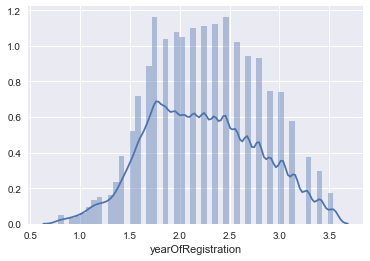

In [39]:
withDamageData.drop(['dateCreated', 'lastSeen'], axis = 1, inplace = True)

"""
# create dummy fields for categorical columns with less than 10 different categories
def create_dummy(df, col_name):
    output = pd.DataFrame(index = df.index)
    for col, col_data in df.iteritems():
        if col == col_name:
            col_data = pd.get_dummies(col_data, prefix = col)
        output = output.join(col_data)
    
    return output
"""

def keepFirstTwo(postalCode):
    postalCode = postalCode / 1000
    return postalCode

withPostalData = withDamageData.copy()

withPostalData['postalCode'] = withPostalData['postalCode'].map(keepFirstTwo)

withPostalData.dropna(subset = ['vehicleType', 'gearbox', 'model', 'fuelType'], inplace = True)
print withPostalData.shape
print withPostalData['vehicleType'].isnull().values.any()
withPostalData.loc[withPostalData['notRepairedDamage'] == 'no', 'notRepairedDamage'] = '0'
withPostalData.loc[withPostalData['notRepairedDamage'] == 'yes', 'notRepairedDamage'] = '1'
withPostalData.loc[withPostalData['gearbox'] == 'manual', 'gearbox'] = '0'
withPostalData.loc[withPostalData['gearbox'] == 'automatic', 'gearbox'] = '1'
for fuelT in ('cng', 'electro', 'hybrid', 'lpg', 'other'):
    withPostalData.drop(withPostalData[withPostalData['fuelType'] == fuelT].index, inplace = True)
    
VTypeData = withPostalData.drop(withPostalData[withPostalData['vehicleType'] == 'other'].index)
#VTypeData = create_dummy(withPostalData, 'vehicleType')
VTypeData.dtypes
VTypeData['yearOfRegistration'] = VTypeData['yearOfRegistration'] - 1949

sns.distplot(np.power(VTypeData['yearOfRegistration'], 2.5) / 10000)

In [40]:
def discard_outliers(feature, data):
    totalNum = data.shape[0]
    
    data = data[data[feature] != 0]
    
    log_data = np.log(data[feature])
    Q1 = np.percentile(log_data, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    print '%f, %f, %f' % (np.exp(Q1), np.exp(Q3), 1.5 * (np.exp(Q3) - np.exp(Q1)))
    data = data[data[feature] >= np.exp(Q1) - 1.5 * (np.exp(Q3) - np.exp(Q1))]
    data = data[data[feature] <= np.exp(Q3) + 1.5 * (np.exp(Q3) - np.exp(Q1))]
    afterNum = data.shape[0]
    print totalNum, afterNum, totalNum - afterNum
    return data

VTypeData = discard_outliers('powerPS', VTypeData)
VTypeData = discard_outliers('yearOfRegistration', VTypeData)

84.000000, 155.000000, 106.500000
274695 253269 21426
50.000000, 59.000000, 13.500000
253269 252951 318


In [41]:
VTypeData['powerPS'].describe()

count    252951.000000
mean        121.188147
std          47.687713
min           1.000000
25%          82.000000
50%         116.000000
75%         150.000000
max         261.000000
Name: powerPS, dtype: float64

In [42]:
VTypeData.shape[0]

252951

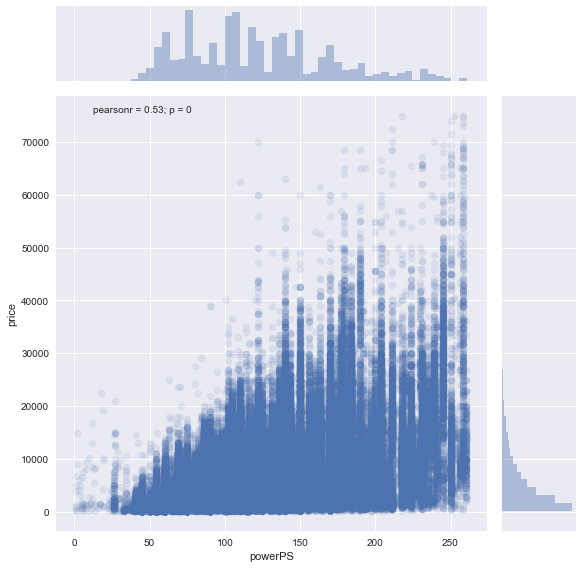

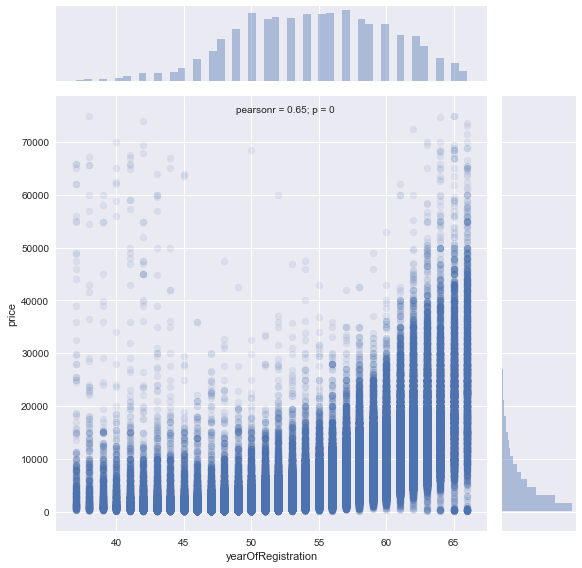

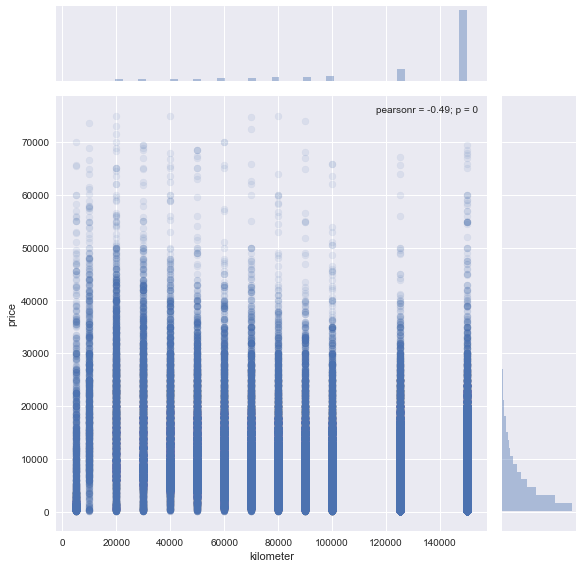

In [43]:
VTypeData = VTypeData[VTypeData['price'] <= 75000]
VTypeData = VTypeData[VTypeData['price'] >= 100]
ax = sns.jointplot(x='powerPS', y='price',data=VTypeData[['powerPS','price']], alpha=0.1, size=8)
sns.plt.show()
ax = sns.jointplot(x='yearOfRegistration', y='price',data=VTypeData[['yearOfRegistration','price']], alpha=0.1, size=8)
ax = sns.jointplot(x='kilometer', y='price',data=VTypeData[['kilometer','price']], alpha=0.1, size=8)

In [44]:
VTypeData.shape[0]

249303

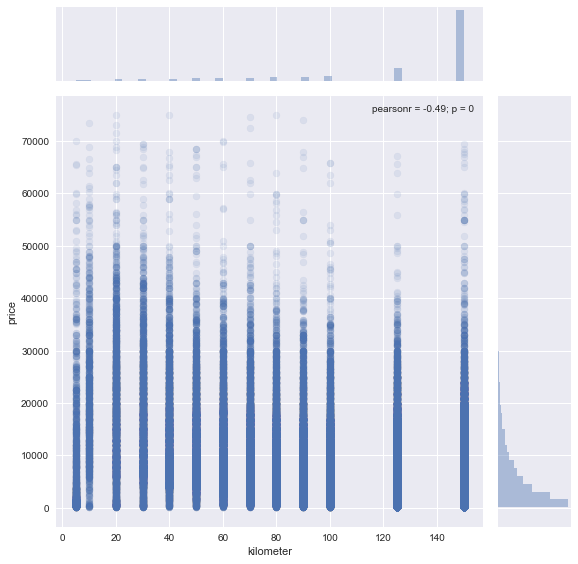

In [23]:
VTypeData['kilometer']  = VTypeData['kilometer'] / 1000
ax = sns.jointplot(x='kilometer', y='price',data=VTypeData[['kilometer','price']], alpha=0.1, size=8)
VTypeData.loc[VTypeData['fuelType'] == 'diesel', 'fuelType'] = '0'
VTypeData.loc[VTypeData['fuelType'] == 'petrol', 'fuelType'] = '1'

In [24]:
VTypeData.head(5)

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,sellSpeed
2,2016-03-14 12:52:21,9800,1,suv,55,1,163,grand,125.0,8,0,jeep,0,90,22 days 12:47:46
3,2016-03-17 16:54:04,1500,1,smallcar,52,0,75,golf,150.0,6,1,volkswagen,0,91,0 days 17:40:17
4,2016-03-31 17:25:20,3600,1,smallcar,59,0,69,fabia,90.0,7,0,skoda,0,60,6 days 10:17:21
5,2016-04-04 17:36:23,650,1,sedan,46,0,102,3er,150.0,10,1,bmw,1,33,2 days 19:17:07
6,2016-04-01 20:48:51,2200,1,convertible,55,0,109,2_reihe,150.0,8,1,peugeot,0,67,4 days 18:18:39


In [83]:
VTypeData.to_csv('cleanData.csv')